In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import functools
import pickle
from operator import add
import uncertainty_toolbox as uct
import matplotlib as mpl
%matplotlib inline
#mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def current_best(ys):
    curr_best = [ys[0]]
    for i, y in enumerate(ys):
        if i == 0:
            continue
        curr_best.append(max(ys[:i]))
    return curr_best
y = []
for i in range(49):
    with open('result/y{0}.pkl'.format(i), 'rb') as f:
        y.append(pickle.load(f))



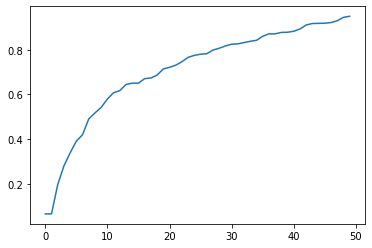

In [6]:
plt.figure()

y_mean = current_best(y[0])
for i in range(1,49):
    y_mean = list(map(add, current_best(y[i]), y_mean))
y_mean = [y_m/49 for y_m in y_mean]    
    #plt.plot(current_best(y[i]))
plt.plot(y_mean)

In [7]:
y_grad = []
for i in range(100):
    with open('grad_result/y{0}.pkl'.format(i), 'rb') as f:
        y_grad.append(pickle.load(f))

y_grad_mean = current_best(y_grad[0])
for i in range(1,100):
    y_grad_mean = list(map(add, current_best(y_grad[i]), y_grad_mean))
y_grad_mean = [y_m/100 for y_m in y_grad_mean]    
    #plt.plot(current_best(y[i]))

#plt.figure()
#for i in range(100):
    #plt.plot(current_best(y_grad[i]))

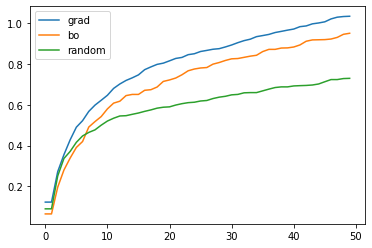

In [8]:
y_random = []
for i in range(100):
    with open('random_result/y{0}.pkl'.format(i), 'rb') as f:
        y_random.append(pickle.load(f))

plt.figure()

'''
for i in range(100):
    plt.plot(current_best(y_random[i]))
'''

y_random_mean = current_best(y_random[0])
for i in range(1,100):
    y_random_mean = list(map(add, current_best(y_random[i]), y_random_mean))
y_random_mean = [y_m/100 for y_m in y_random_mean]

plt.plot(y_grad_mean, label='grad')        
plt.plot(y_mean, label='bo')
plt.plot(y_random_mean, label='random')
plt.legend()

## Uncertainty-toolbox

In [3]:
uct.viz.set_style()
uct.viz.update_rc("text.usetex", True)  # Set to True for system latex
uct.viz.update_rc("font.size", 14)  # Set font size
uct.viz.update_rc("xtick.labelsize", 14)  # Set font size for xaxis tick labels
uct.viz.update_rc("ytick.labelsize", 14)  # Set font size for yaxis tick labels

# Set random seed
np.random.seed(11)

# Generate synthetic predictive uncertainty results
#n_obs = 650
#f, std, y, x = uct.synthetic_sine_heteroscedastic(n_obs)
#print(y)

# Save figure (set to True to save)
#savefig = True


def make_plots(pred_mean, pred_std, y, plot_save_str="row"):
    """Make set of plots."""

    #ylims = [-3, 3]
    #n_subset = 50
    plt.figure()
    #fig, axs = plt.subplots(1, 3, figsize=(17, 8))

    # Make xy plot
    #axs[0] = uct.plot_xy(
        #pred_mean, pred_std, y, x, n_subset=300, ylims=ylims, xlims=[0, 15], ax=axs[0]
    #)

    # Make ordered intervals plot
    #axs[1] = uct.plot_intervals_ordered(
        #pred_mean, pred_std, y, n_subset=n_subset, ylims=ylims, ax=axs[1]
    #)

    # Make calibration plot
    fig = uct.plot_calibration(pred_mean, pred_std, y)
    return fig

    # Adjust subplots spacing
    #fig.subplots_adjust(wspace=0.25)

    # Save figure
    #if savefig:
        #uct.viz.save_figure(plot_save_str, "svg", white_background=True)


with open('result/predict/yhat0.pkl', 'rb') as f1:
    pred_mean_list = pickle.load(f1)
with open('result/uncertainty/yhat_0.pkl', 'rb') as f2:
    pred_std_list = pickle.load(f2)
    
with open('result/label/y0.pkl', 'rb') as f3:
    y = pickle.load(f3)
def convert_ndarray(ls):
    out = []
    for l in ls:
        out.append(l)
    return np.array(out)
y = convert_ndarray(y)
pred_std_list = convert_ndarray(pred_std_list)
pred_mean_list = convert_ndarray(pred_mean_list)

#print(y)
#print(pred_std_list)
#print(pred_mean_list)
# List of predictive means and standard deviations
#pred_mean_list = [f]

#pred_std_list = [
    #std * 0.5,  # overconfident
    #std * 2.0,  # underconfident
    #std,  # correct
#]

# Loop through, make plots, and compute metrics
idx_counter = 0
'''
for i, pred_mean in enumerate(pred_mean_list):
    for j, pred_std in enumerate(pred_std_list):
        #mace = uct.mean_absolute_calibration_error(pred_mean, pred_std, y)
        #rmsce = uct.root_mean_squared_calibration_error(pred_mean, pred_std, y)
        #ma = uct.miscalibration_area(pred_mean, pred_std, y)

        idx_counter += 1
        make_plots(pred_mean, pred_std, y)

        print(f"MACE: {mace}, RMSCE: {rmsce}, MA: {ma}")
'''

        
fig = make_plots(pred_mean_list, pred_std_list, y)
plt.show(fig)



<Figure size 800x800 with 0 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x1000 with 1 Axes>

In [4]:
"""
Examples of code for visualizations.
"""

import numpy as np
import matplotlib.pyplot as plt
import uncertainty_toolbox as uct


# Set plot style
uct.viz.set_style()
uct.viz.update_rc("text.usetex", True)  # Set to True for system latex
uct.viz.update_rc("font.size", 14)  # Set font size
uct.viz.update_rc("xtick.labelsize", 14)  # Set font size for xaxis tick labels
uct.viz.update_rc("ytick.labelsize", 14)  # Set font size for yaxis tick labels

# Set random seed
np.random.seed(11)

# Generate synthetic predictive uncertainty results
n_obs = 650
f, std, y, x = uct.synthetic_sine_heteroscedastic(n_obs)

# Save figure (set to True to save)
savefig = True


def make_plots(pred_mean, pred_std, plot_save_str="row"):
    """Make set of plots."""

    ylims = [-3, 3]
    n_subset = 50

    fig, axs = plt.subplots(1, 3, figsize=(17, 8))

    # Make xy plot
    axs[0] = uct.plot_xy(
        pred_mean, pred_std, y, x, n_subset=300, ylims=ylims, xlims=[0, 15], ax=axs[0]
    )

    # Make ordered intervals plot
    axs[1] = uct.plot_intervals_ordered(
        pred_mean, pred_std, y, n_subset=n_subset, ylims=ylims, ax=axs[1]
    )

    # Make calibration plot
    axs[2] = uct.plot_calibration(pred_mean, pred_std, y, ax=axs[2])

    # Adjust subplots spacing
    fig.subplots_adjust(wspace=0.25)

    # Save figure
    if savefig:
        uct.viz.save_figure(plot_save_str, "svg", white_background=True)


# List of predictive means and standard deviations
pred_mean_list = [f]

pred_std_list = [
    std * 0.5,  # overconfident
    std * 2.0,  # underconfident
    std,  # correct
]

# Loop through, make plots, and compute metrics
idx_counter = 0
for i, pred_mean in enumerate(pred_mean_list):
    for j, pred_std in enumerate(pred_std_list):
        mace = uct.mean_absolute_calibration_error(pred_mean, pred_std, y)
        rmsce = uct.root_mean_squared_calibration_error(pred_mean, pred_std, y)
        ma = uct.miscalibration_area(pred_mean, pred_std, y)

        idx_counter += 1
        make_plots(pred_mean, pred_std, f"row_{idx_counter}")

        print(f"MACE: {mace}, RMSCE: {rmsce}, MA: {ma}")

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8f2e64f950> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 3400x1600 with 3 Axes>